#Práctica 0. Pablo Rodríguez Fernández

#Preparativos



Montamos el Drive para poder acceder a las imágenes

In [7]:
from google.colab import drive
drive.mount('./drive')

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


Cargamos los paquetes utilizados en la práctica



In [8]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

#Ejercicio 1


***Escribir una función que lea el fichero de una imagen y permita mostrarla
tanto en grises como en color (im=leeimagen(filename, flagColor)).
flagColor es la variable que determina si la imagen se muestra en escala
de grises o en color.***

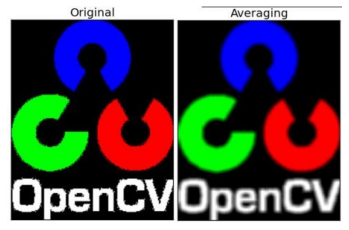

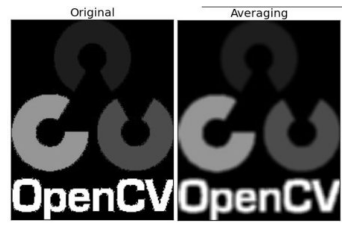

In [9]:
def leeimagen(filename,flagColor): #flagColor: 0->Color  1->Escala de grises
    #Lectura    
    img = cv.imread(filename,flagColor) 
    #Visualizacion
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB) )
    plt.axis('off')


path='./drive/My Drive/Colab Notebooks/images/logoOpenCV.jpg'
plt.figure(1)
leeimagen(path,1)  
plt.figure(2)
leeimagen(path,0)

##Explicación
En este ejercicio se implementa una función que, tomando como argumentos la ruta a una imagen y una flag de color, muestra dicha imagen.

La flag puede tomar dos valores:


*   0 -> La imagen se muestra en color
*   1 -> La imagen se muestra en escala de grises

La elección de estos valores no es arbitraria, ya que son los valores que utiliza la función de OpenCV *imread()* para representar exactamente ese hecho.

Cabe destacar que la imagen se muestra utilizando la función *imshow()* de la biblioteca *matplotlib*. Esta biblioteca interpreta las imágenes tribanda en formato RGB. Sin embargo, OpenCV utiliza el formato BGR, de ahí que sea necesario emplear la expresión *cv.cvtColor(img,cv.COLOR_BGR2RGB)* para cambiar la imagen de formato BGR a RGB.

Finalmente, comentar que se utiliza la función *plt.figure()* para poder mostrar dos ejecuciones de la función (una con cada flag). Esta función se utilizará más adelante en otros ejercicios de esta práctica.




#Ejercicio 2


**Escribir una función que permita visualizar una matriz de números reales cualquiera/arbitraria, tanto monobanda como tribanda (pintaI(im)). Para ello se deberá escalar el rango de cada banda al intervalo [0,1] sin pérdida de información.**

Matriz unibanda


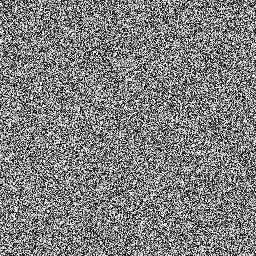


Matriz tribanda


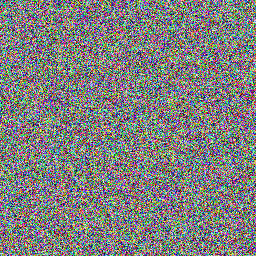

In [10]:
def pintl(im):
  #Sumar el minimo y multiplicamos por el maximo (ya que el rango numerico es entre [-1,1])
  im=(im+abs(np.min(im))) #Sumamos el valor minimo en valor absoluto
  im=im/np.max(im) #Dividimos todos los valores entre el maximo de la matriz obtenida en el paso anterior
  im = np.array(im*255, dtype = np.uint8) #Escalamos al intervalo [0,255] para que OpenCV muestre correctamente la escala de grises
  cv2_imshow(im)

#Unibanda
print('Matriz unibanda')
img = np.random.uniform(-1,1,(256,256))
pintl(img)
#Tribanda
print('\nMatriz tribanda')
img = np.random.uniform(-1,1,(256,256,3))
pintl(img)

En este ejercicio, se generan inicialmente 2 matrices de números reales aleatorios con valores en el intervalo [-1,1], empleando para ello la función de *numpy* *random.uniform()*, que genera valores siguiendo una distribución uniforme. 

Una de las matrices tiene tamaño 256x256, representando una imagen unibanda (a escala de grises) ; mientras que la otra tiene tamño 256x256x3, representando una imagen tribanda (a color).

Para cada una de las matrices se invoca a la función *pintml()* la cual inicialmente traslada todos los valores del intervalo [-1,1] al intervalo [0,1]. Esto se hace en dos pasos:

* Primero, sumamos a todas las entradas de la matriz el valor mínimo de ella en valor absoluto (ya que existirán probablemente valores negativos en ella). De esta manera, nos encontraríamos en el intervalo [0,2].

* Finalmente, dividimos todos los valores entre el máximo de la nueva matriz, quedando por tanto todos los valores dentro del intervalo [0,1]

Finalmente, convertimos las matrices en arrays de *numpy* de tipo *np.uint8*, multiplicándo además los valores por 255 para escalar al intervalo [0,255]. La razón de este hecho es que OpenCV representa los valores en este intervalo y, de no hacerlo, se mostrarían las matrices como imágenes totalmente negras.



#Ejercicio 3


**Escribir una función que visualice varias imágenes distintas a la vez (concatenando las imágenes en una última imagen final1): pintaMI(vim). (vim será una secuencia de imágenes)**

Concatenacion redimensionando a altura común


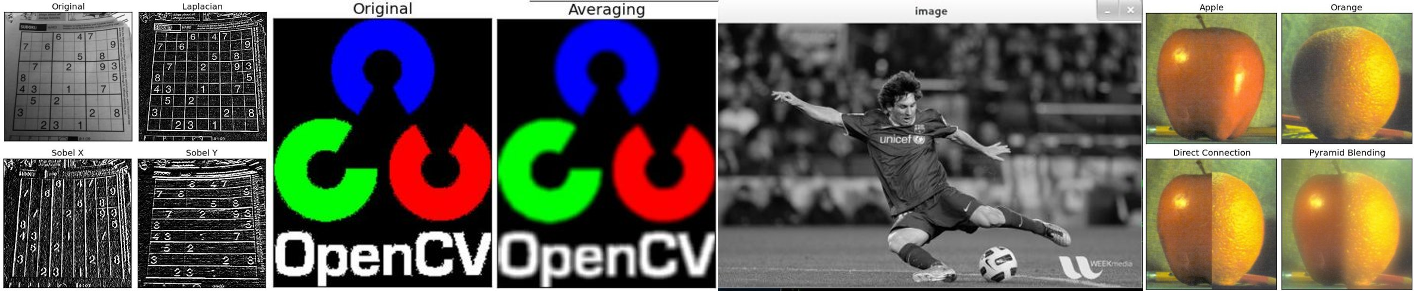


Concatenacion sin redimensionado


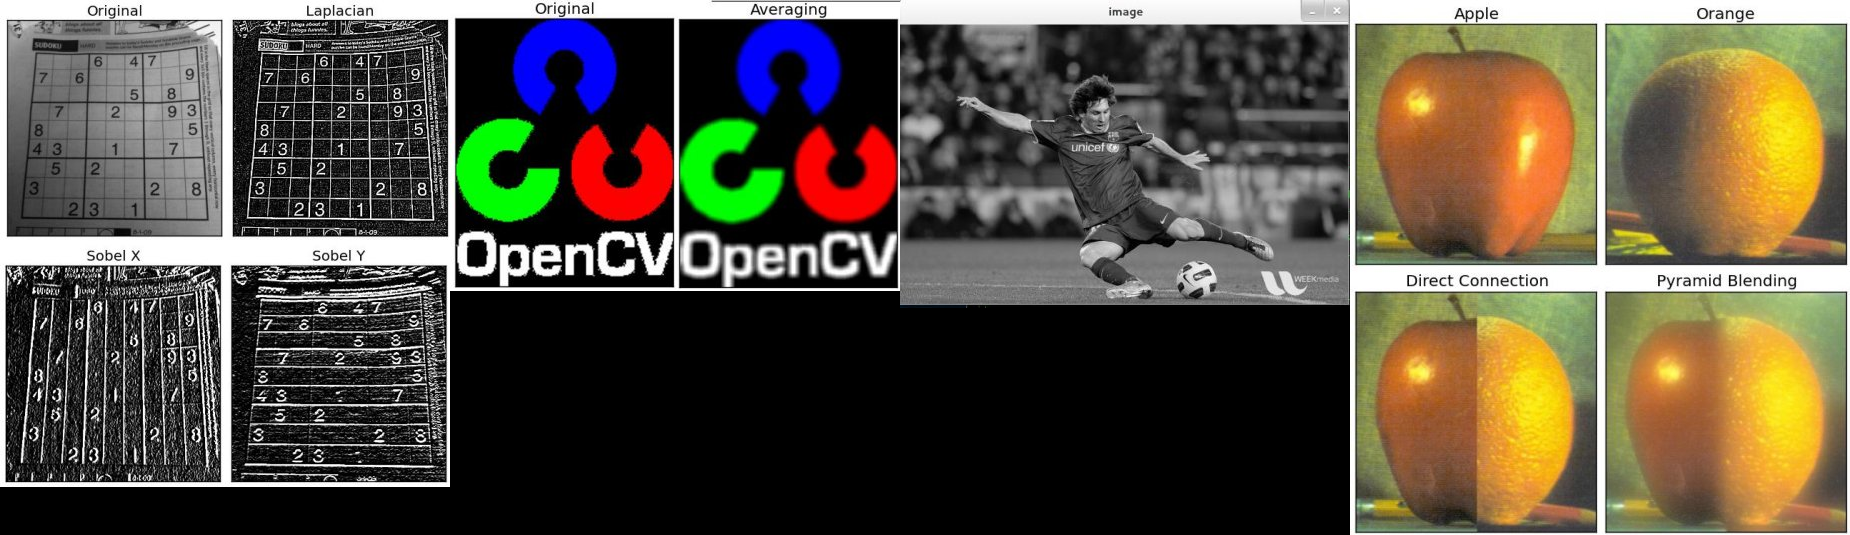

In [11]:
def pintaMI_redimensionando(vim):
    #Adaptacion a altura comun
    h_min = min(img.shape[0] for img in vim)
    vim_resize = [cv.resize(img,(int(img.shape[1] * h_min / img.shape[0]),h_min), interpolation= cv.INTER_CUBIC) for img in vim]
    #Concatenacion
    im_concat=cv.hconcat(vim_resize)
    #Visualizacion
    cv2_imshow(im_concat)
    cv.waitKey(0)
    cv.destroyAllWindows()

def pintaMI(vim):
  max_height = 0 # find the max hight of all the images
  total_width = 0 # the total width of the images (horizontal stacking)

  max_height = max(img.shape[0] for img in vim)
  total_width = sum(img.shape[1] for img in vim)

  # create a new array with a size large enough to contain all the images
  final_image = np.zeros((max_height,total_width,3),dtype=np.uint8)

  current_x = 0 # keep track of where your current image was last placed in the x coordinate
  for img in vim:
    # add an image to the final array and increment the x coordinate
    final_image[:img.shape[0],current_x:img.shape[1]+current_x,:] = img
    current_x += img.shape[1]
  
  cv2_imshow(final_image)
  cv.waitKey(0)
  cv.destroyAllWindows()

#Lectura
path_images='./drive/My Drive/Colab Notebooks/images/'

images = []
images.append(cv.imread(path_images+"dave.jpg"))
images.append(cv.imread(path_images+"logoOpenCV.jpg"))
images.append(cv.imread(path_images+"messi.jpg"))
images.append(cv.imread(path_images+"orapple.jpg"))

print("Concatenacion redimensionando a altura común")
pintaMI_redimensionando(images)
print("\nConcatenacion sin redimensionado")
pintaMI(images)


Para este ejercicio implementé 2 funciones diferentes.

Inicialmente, implementé la función *pintaMI_redimensionando()*, la cual modifica las imágenes para que tengan la misma altura, lo cual permite utilizar la función de OpenCV *hconcat()* para concatenarlas horizontalmente. Esta función es una adaptación de una función que puede encontrarse en https://www.geeksforgeeks.org/concatenate-images-using-opencv-in-python/


Sin embargo, en la clase de prácticas se comentó que esta no era la mejor opción, ya que naturalmente se deformaban las imágenes para poder concaternalas. Se sugirió que lo mejor era crear un array/matriz lo suficientemente grande que permitiese colocar todas las imágenes, y situarlas manualmente.
Esta opción es la que se implementa en la función *pintaMI()*, la cual es una adaptación a concatenación horizontal de una función que se puede consultar en la primera respuesta de https://stackoverflow.com/questions/47254294/how-to-concatenate-images-of-different-shapes-using-python-and-opencv

El funcionamiento de la segunda función sería el siguiente:

* En primer lugar es obtener la altura de la imagen más alta y la anchura de la imagen final (sumando la anchura de todas las imágenes).

* Tras esto, crea una matriz tribanda de tamaño alturaMaxima*anchuraTotal, en la cual se pondrán las diferentes imágenes.
* Finalmente, se concatenan las diferentes imágenes, colocando los píxeles de cada una de ellas sobre la matriz, actualizando el desplazamiento sobre el eje X (la anchura) para que las imágenes no se superpongan.

Este método permite que la imagen final muestre las imágenes a su tamaño real, si bien añade pixeles negros en aquellas que no quedan cubiertas.

#Ejercicio 4

**Escribir una función que modifique el color en la imagen de cada uno de los elementos de una lista de coordenadas de píxeles. En concreto, los alumnos deben insertar un cuadrado azul de 100x100 pixeles en el centro de la imagen a modificar.**

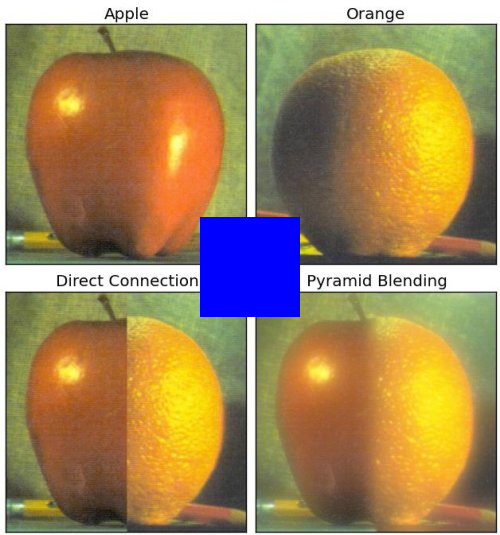

In [12]:
def modificarPixeles(path,listPix,color):
  img = cv.imread(path)
  for pixel in listPix:
    img[pixel[0],pixel[1]] = color
  cv2_imshow(img) 
  cv.waitKey(0)

def obtenerPixelesCuadrado(path):
  img = cv.imread(path)
  ancho,altura,canales = img.shape
  #Obtenemos el pixel central de la imagen
  pixel_center = [np.floor(ancho/2) , np.floor(altura/2)]
  #Obtenemos el pixel de la esquina superior izquierda del cuadrado
  esquina_cuadrado =[pixel_center[0]-50,pixel_center[1]-50] 
  #Obtenemos todos los pixeles que componen el cuadrado (como enteros)
  pixeles=[]
  for i in range(100):
    for j in range(100):
      pixeles.append((int(esquina_cuadrado[0]+i),int(esquina_cuadrado[1]+j)))
  return pixeles

path='./drive/My Drive/Colab Notebooks/images/orapple.jpg'

listPix= obtenerPixelesCuadrado(path)
color = (255,0,0) #(255,0,0) := Azul en BGR
modificarPixeles(path,listPix,color)


La principal complicación de este ejercicio es la obtención del listado de pixeles a dibujar, lo cual es el parámetro que se le debe pasar a la función que modifique los pixeles de una imagen.

Dicha función tiene por nombre *modificarPixeles()* la cual, dado la ruta a una imagen, una lista de pixeles y un color (en formato BGR), modifica los pixeles de la imagen dada coloreándolos del color dado. La elección del formato BGR en lugar de RGB viene de que, como se mencionó anteriormente, OpenCV utiliza BGR.

Por otro lado, la función *obtenerPixelesCuadrado()* devuelve, dado la ruta a una imagen, los pixeles de esta que forman un cuadrado de lado 100 en el centro de la misma. Para ello, se realiza el siguiente proceso:
* En primer lugar, se lee la imagen y se obtiene  su altura y su ancho mediante la propiedad *shape* de la imagen. 

* Tras esto , se calcula el centro del la imagen (y del cuadrado), el cual estará en las coordenadas (ancho/2,altura/2). Como la imagen podría tener un ancho o altura impar, se emplea el redondeo hacia abajo (función *floor()*) para evitar problemas.

* Una vez se tiene el centro, se pasa a calcular la esquina superior izquierda. Como se trata de un cuadrado, cuyos lados son todos iguales, basta restar la mitad del lado (en este caso, sería 50) a la altura y al ancho.

* Finalmente,obtenemos el listado de pixeles del cuadrado movíendonos 100 pixeles a la derecha y 100 pixeles hacia abajo, partiendo de la esquina que obtuvimos en el paso anterior (lo cual se realiza en el bucle anidado de la función).



#Ejercicio 5

**Una función que sea capaz de representar varias imágenes con sus títulos en una misma ventana.**

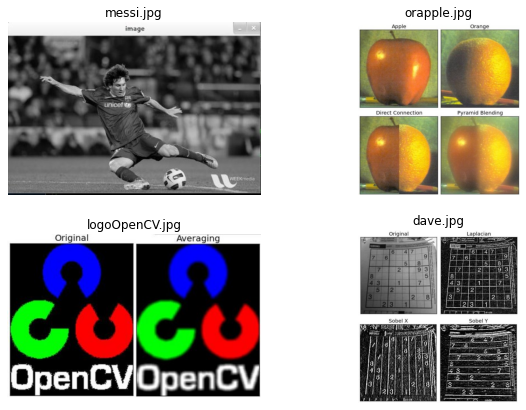

In [13]:
def visualizar(images,titles):
  
  fig = plt.figure(figsize=(10,7))
  rows=2
  columns=2

  for i in range(len(images)):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(cv.cvtColor(images[i],cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(titles[i])


#Lectura
path_images='./drive/My Drive/Colab Notebooks/images/'
images = []
titles =[]
images.append(cv.imread(path_images+"messi.jpg"))
titles.append("messi.jpg")
images.append(cv.imread(path_images+"orapple.jpg"))
titles.append("orapple.jpg")
images.append(cv.imread(path_images+"logoOpenCV.jpg"))
titles.append("logoOpenCV.jpg")
images.append(cv.imread(path_images+"dave.jpg"))
titles.append("dave.jpg")

visualizar(images,titles)

En este ejercicio, en primer lugar leemos las imágenes y sus títulos y los almacenamos en dos vectores  (uno para imágenes y otro para títulos).
Tras ello, invocamos a la función *visualizar()*, que muestra en una misma ventana las imágenes acompañadas de su correspondiente título.

La estructura de la función sería la siguiente:
*  En primer lugar, se crea una figura donde presentar las imágenes (a la cual le pasamos como parámetro el tamaño que queremos que tenga). 

* Tras ello, seleccionamos el número de columnas y filas en las que queremos que se distribuyan las imágenes (en este caso, como son 4 imágenes, las distribuí en 2 filas de 2 imágenes). La función podría adaptarse para obtener estos valores como argumentos, lo cual quizás realizo en un futuro en función del uso que le vaya a dar.

* Finalmente, se añaden las imágenes a la figura, empleando para ello el método *add_subplot()*, indicándole en que región (fila y columna) queremos colocar la imagen, mostrándola con *imshow()* (empleando la correción de color BGR que se vio anteriormente) y colocando su título con *plt.title()*. Se utiliza también *plt.axis('off')* para que no se muestren ejes coordenados en los bordes de las imágenes, ya que *matplotlib* es un paquete pensado principalmente para gráficas, poniendo ejes por defecto.
